# Assignment for Module - Machine Learning and Statistics
##### Author: Sheldon D'Souza G00387857

### Using the SciPy Stats Library to perform One-Way ANOVA <sup>[1] [2] [3]</sup>

Scipy a library within Python that a user to perform scientific and technical computing of data. The SciPy library also has extensive features which support the statistical analysis and computing of data. Python SciPy is open-source and is free to use.

Scipy builds on Numpy and the features and functions of numpy. The main difference between SciPy and numpy, is that numpy contains basic data and array operations within it, whereas scipy contains the fully equipped versions of all mathematical and scientific numerical functions 
The Scipy library has a number of sub packages which can be used for different purposes and function depending on the particular needs of the user. 

Some of these sub-packages include:
- stats – statistical distribution and functions
- io – input and output
- linalg – Linear algebra
- special – Special Functions

Scipy stats is a sub-package which contains all of the functions used for statistical analysis of data. The “info(stats)” function can be used to obtain a list of the statistics function within the sub-package. These functions can be used to perform a variety of statistical tests on data ranging from medical trials to social sciences analysis.

We will look at some of the key functions within the sub-package:

- Distributions – The scipy stats package can be used to generate normal, uniform etc. distributions. As with numpy, the results are only reproduceable if a constant seed is used.
- Descriptive Statistics - These include functions which give us more information about the data on hand so that the user can make informed decisions. Some of these are available in numpy such as minimum, maximum, mean and median. Scipy stats further adds to these function by giving the user access to functions such as “describe()”, which provides several descriptive statistics on the data. “gmean()” allows the user to calculate the geometric mean. “mode()”, returns the modal value and skew() returns the skewness of the data.
- T-test – Scipy stats allows the user to perform a t-test on the data. The t test provides information on the significance of differences between groups (if any) are and whether those differences (measured in means) could have happened by chance. T tests are used to compare the means of a condition between two groups
- ANOVA - ANOVA stands for "Analysis of Variance". ANOVA can generally be thought of as a generalization of the t tests for more than two groups. The main types of ANOVA are (1) One-Way ANOVA: A one-way ANOVA has just one independent variable (2) Two-Way ANOVA: A two-way ANOVA (also called factorial ANOVA) refers to an ANOVA using two independent variables (3) N-Way ANOVA: A N way ANOVA test uses more than two independent variables, (with n being the number of independent variables you have), aka MANOVA Test

### Importing the necessary packages

In [1]:
import pandas as pd  # Pandas for dataframe.

import seaborn as sns # Seaborn for Plotting.

import scipy.stats as ss # SciPy Stats

import numpy as np # Numpy for arrays 

import collections as co # Collections

import scipy.special as spec # SciPy Specials

import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Importing the Dataset

About the dataset (https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html)

The data set contains information on people who undertook one of three diets. There is background information such as age, gender, and height. The aim of the study was to see which diet was best for losing weight.

In [2]:
# Import the data

# Data also can be found at: df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv')

df = pd.read_csv('files\stcp-Rdataset-Diet.csv', sep=',')

### Exploring and preprocessing the dataset

In [3]:
# replacing the blank fields with NaN

df = df.replace(r'^\s*$', np.nan, regex=True) #https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

In [4]:
# Shape of the dataset
df.shape

(78, 7)

In [5]:
# Head of the data

df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [6]:
## Check which fields have NaN Values

df[df.isnull().values]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0


In [7]:
# Finding the averge heights of the males and females in order to classify the missing gender values as male or female

avg_height_male = df[df['gender']=="1"]
avg_height_male = avg_height_male['Height']
print("The averge Male Height is:", np.mean(avg_height_male))

avg_height_female = df[df['gender']=="0"]
avg_height_female = avg_height_female['Height']
print("The averge Female Height is:", np.mean(avg_height_female))

The averge Male Height is: 175.24242424242425
The averge Female Height is: 167.34883720930233


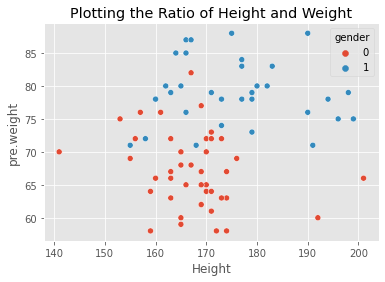

In [8]:
sns.scatterplot(x = df["Height"], y = df["pre.weight"], hue = df['gender'])
plt.title("Plotting the Ratio of Height and Weight")
plt.show()

As can be seen from the above plot the gender for category 1 is higher that that of gender category 0. We can therefore assume that Category 1 for gender is for Males and Category 0 is for females.  

In [9]:
# Classified the missing gender values as Male ("1") based on the height values compared to the average height in the dataset for each gender

df['gender'] = df['gender'].fillna("1") #https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

In [10]:
# Adding BMI change rather than weight change as the values will be tighter. I don't expect there to be a major change in either method of analysis 


df['BMI_start'] = df["pre.weight"] / (df["Height"] / 100)**2
df["BMI_end"] = df["weight6weeks"] / (df["Height"] / 100)**2
df["BMI_change"] = df['BMI_start'] - df["BMI_end"]

In [11]:
df.describe() # Description of the dataframe

,Person,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769,25.106408,23.756283,1.350125
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504,4.035443,3.849182,0.934202
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000,16.276042,14.648438,-0.693619
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000,22.133637,20.933197,0.681503
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000,24.754720,23.420773,1.271620
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000,28.435113,26.634658,1.986516
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000,35.209497,34.020346,3.520950


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
 7   BMI_start     78 non-null     float64
 8   BMI_end       78 non-null     float64
 9   BMI_change    78 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 6.2+ KB


### Checking whether the dataset meets the Assumptions for ANOVA <sup>[4] [5] [6]</sup>

#### Assumption 1 - Identifying the Dependent Variable

In [13]:
# Dependent variable is weight loss measured by change in BMI of the individual
# The dependent variable should be measured at the interval or ratio level

print("The dependent variable is BMI_change as this is the variable which changes based on the type of Diet")

df['BMI_change']


The dependent variable is BMI_change as this is the variable which changes based on the type of Diet


0     0.000000
1     0.000000
2     1.503105
3     1.627604
4     0.242215
        ...   
73    0.836095
74    1.308692
75    1.970553
76    3.298792
77    1.991837
Name: BMI_change, Length: 78, dtype: float64

#### Assumption 2 - Identifying the Independent Variable

In [14]:
# Independent variable is the type of diet
# The independent variable should consist of two or more categorical, independent groups

print("The independent variable is Diet. We are checking the impact of the type of diet on BMI change")

df['Diet']

# The criteras are met because the independent variable is categorical (i.e. type of diet) and independent as a person cannot be on more than one diet types.

The independent variable is Diet. We are checking the impact of the type of diet on BMI change


0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

#### Assumption 3 - Independence of observations

<i>You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group.</i>

Commentary: See step 2. As each participant has only undertaken one diet type. Therefore this condition is deemed to have been met.

#### Assumption 4 - Outliers

<i>There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual pattern</i>

We will identify outliers by plotting box plots of the independent variables classified by each category.

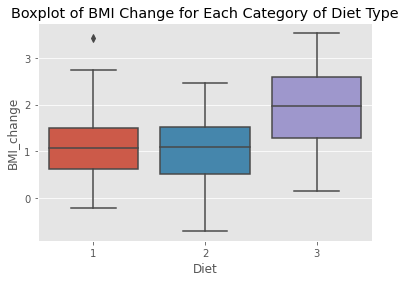

In [15]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x=df['Diet'], y=df['BMI_change'])
plt.title("Boxplot of BMI Change for Each Category of Diet Type")
plt.show()

Only the Type 1 diet has a single outlier as per the box plots above. By looking at the box plots we can see that the outlier is around the 3.4 mark. We will look to identify the relevant row below to see if there a basis for exclusion of that particular item.

In [16]:
df[df['BMI_change']>=3.4]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
38,60,0,58,141,70,3,63.0,35.209497,31.688547,3.520950
49,19,1,43,162,80,1,71.0,30.483158,27.053803,3.429355


While the outlier could be a misclassifed entry, there really is no basis to exclude the observation based on the information we have and so we will leave this observation as part of the data.

#### Assumption 5 - Normally Distributed

<i>Your dependent variable should be approximately normally distributed for each category of the independent variable</i>

We will plot a kde plot of each categiry of the independent variable using the distplot within seaborn. The aim of the plots is to check whether each of the observations within each category of the independent variable is normally distributed.

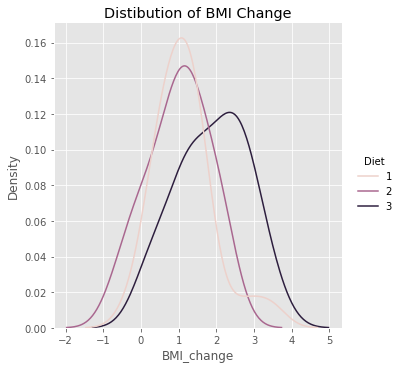

In [17]:
# KDEs of the three categories.

sns.displot(x=df['BMI_change'], hue=df['Diet'], kind="kde")
plt.title("Distibution of BMI Change")
plt.show()

We can see from the above plot that each of the plots are approximately normally distributed. The Type 2 diet seems to have the most conventional normal distribution. The Type 1 and Type 3 diet seem to have a couple of kinks in the distribution but these are not too severe for us to conclude that they are not normally distributed.

<u>Running the Shapiro Wilk Test for checking normality of the dependent variable</u>

In [18]:
# Shapiro Wilk Test - Diet Type 1

ss.shapiro(df['BMI_change'][df['Diet'] == 1])


ShapiroResult(statistic=0.9227969646453857, pvalue=0.06736458837985992)

In [19]:
# Shapiro Wilk Test - Diet Type 2

ss.shapiro(df['BMI_change'][df['Diet'] == 2])


ShapiroResult(statistic=0.9763475060462952, pvalue=0.7722797989845276)

In [20]:
# Shapiro Wilk Test - Diet Type 3

ss.shapiro(df['BMI_change'][df['Diet'] == 3])


ShapiroResult(statistic=0.9632238149642944, pvalue=0.43632328510284424)

Based on the above 'Statistic' values as well as the 'p' values we can conclude that the data is normally distributed for each category of the independent variable. The dataset for Diet Type 1 has the worst p value, however this is above the 0.05 threshold required for the data to be normally distributed.

#### Assumption 6 - Homogeneity of Variances

<i>There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.</i>

As mentioned above we will use Levene's test as below:

In [21]:
# Test for equal variances.
ss.levene(
    df['BMI_change'][df['Diet'] == 1],
    df['BMI_change'][df['Diet'] == 2],
    df['BMI_change'][df['Diet'] == 3]
)

LeveneResult(statistic=1.0043048620443853, pvalue=0.37117119715835095)

In the above we can see that the p-value is not less than .05. This means that we would fail to reject the null hypothesis i.e. we do not have sufficient evidence to say that the variance in BMI change between the three Diet plans is significantly different.

We can see this visually as well in the boxplots. Each of the boxplots do not seem to be signifcantly larger than each other.

Based on the above, we can conclude that there is homogeneity of variances.

#### One-way ANOVA

In [22]:
# ANOVA.
ss.f_oneway(
    df['BMI_change'][df['Diet'] == 1],
    df['BMI_change'][df['Diet'] == 2],
    df['BMI_change'][df['Diet'] == 3]
)

F_onewayResult(statistic=8.344341031617384, pvalue=0.0005345120426406237)

#### Conclusion

The F test statistic is 8.3443 and the corresponding p-value is 0.00053. Since the p-value is less than .05, we reject the null hypothesis.

This means we have sufficient evidence to say that there is a difference in BMI change among the three Diet plans.

#### Post-Hoc Test [7] [8]

We will attempt a simple posthoc test to see which groups have differences between them:

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['BMI_change'], df['Diet']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.149 0.7897 -0.7233 0.4253  False
     1      3   0.7439 0.0077  0.1696 1.3182   True
     2      3   0.8928  0.001  0.3357   1.45   True
---------------------------------------------------


Based on the above we can conclude that there is a statistically significant difference beween the Diet Type 1 and 3 as well as the diet type 2 & 3. However there is no significant difference between the diet type 1 and 2.

### References:

[1] - SciPy Stats Library - https://docs.scipy.org/doc/scipy/reference/stats.html

[2] - SciPy Stats Tutorial - https://www.tutorialspoint.com/scipy/scipy_stats.htm

[3] - Introduction to ANOVA - https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

[4] - LAERD One Way ANOVA - https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

[5]  ANOVA - https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/

[6] - ANOVA Using Python - https://www.reneshbedre.com/blog/anova.html

[7] - Post Hoc Test - https://stackoverflow.com/questions/16049552/what-statistics-module-for-python-supports-one-way-anova-with-post-hoc-tests-tu

[8] - Post Hoc Test Blog - https://jpktd.blogspot.com/2013/03/multiple-comparison-and-tukey-hsd-or_25.html


***
#### End of Scipy Stats - One Way ANOVA